In [135]:
import numpy as np
import xarray as xr
import pandas as pd
from dask.diagnostics import ProgressBar
from xgcm.grid import Grid
import xrft
import gsw
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline
ProgressBar().register()

# Load data

In [64]:
from intake import open_catalog
import xmitgcm.llcreader as llcreader
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")

u = cat.LLC4320_SSU.to_dask()
v = cat.LLC4320_SSV.to_dask()
ssh = cat.LLC4320_SSH.to_dask()
ds = xr.merge([u, v,ssh])
ds = llcreader.llcmodel.faces_dataset_to_latlon(ds, metric_vector_pairs=[])

# reset_coords()则是将坐标变量转换为数据变量
coords = cat.LLC4320_grid.to_dask().reset_coords()
coords = llcreader.llcmodel.faces_dataset_to_latlon(coords)

In [65]:
ds.Eta

<xarray.DataArray 'Eta' (time: 9030, j: 12960, i: 17280)>
dask.array<concatenate, shape=(9030, 12960, 17280), dtype=float32, chunksize=(1, 4320, 4320), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279

In [66]:
ds

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 17280, j: 12960, time: 9030, i: 17280, j_g: 12960)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>

In [67]:
coords

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_p1: 2,
              time: 9030)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * k_p1     (k_p1) int64 0 1
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables: (12/30)
    CS       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    PHrefC   float32 15.4
    PHrefF   (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    SN       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    ...       ...
    rAw      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>

[########################################] | 100% Completed | 1.42 sms
[########################################] | 100% Completed | 1.52 s


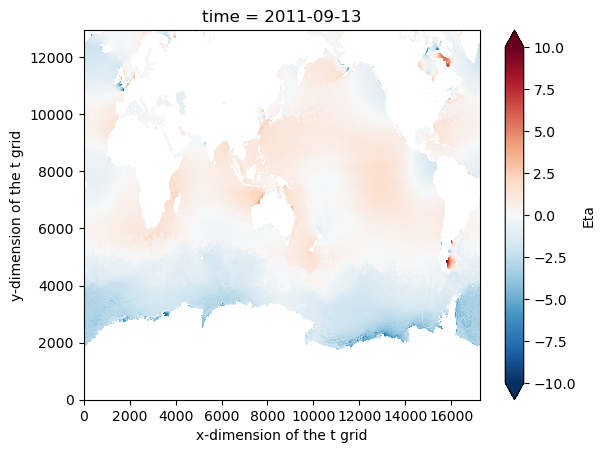

In [68]:
ds.Eta.isel(time=0,j=slice(0,None,10),i=slice(0,None,10)).plot(cmap='RdBu_r', vmin=-10,vmax=10)
# inferno
# RdBu_r

[########################################] | 100% Completed | 611.05 ms
[########################################] | 100% Completed | 711.75 ms


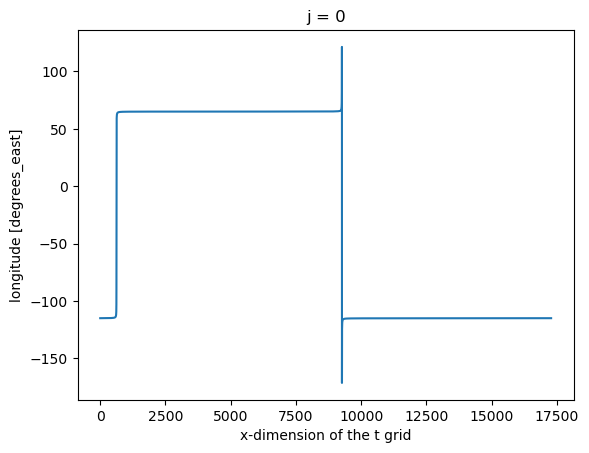

In [69]:
lon = coords.XC.sel(j=0)
lat = coords.YC.sel(i=0)
lon.plot()

In [70]:
# 找到 lon 的最大值和最小值
lon_max = lon.max().values
lon_min = lon.min().values

print(f"最大经度值: {lon_max}")
print(f"最小经度值: {lon_min}")

[########################################] | 100% Completed | 510.26 ms
[########################################] | 100% Completed | 608.70 ms
[########################################] | 100% Completed | 813.24 ms
[########################################] | 100% Completed | 912.82 ms
最大经度值: 121.30435180664062
最小经度值: -171.30435180664062


In [71]:
# gridllc.interp(ds.U.isel(time=0),'X',boundary='extend') # 坐标轴的变换

In [72]:
# plt.pcolormesh(lon.isel(i=slice(0,None,10)), lat.isel(j=slice(0,None,10)), ds.Eta.isel(time=-1,i=slice(0,None,10),j=slice(0,None,10)), vmin=-5, vmax=5, cmap='RdBu_r')

In [174]:
i1, i2 = 0, None
# i1, i2 = 8000, 10000
j1, j2 = 3500, 6500

dxC_sel = coords.dxC.isel(i_g=slice(i1, i2), j=slice(j1, j2))
dyG_sel = coords.dyG.isel(i_g=slice(i1, i2), j=slice(j1, j2))
dyC_sel = coords.dyC.isel(i=slice(i1, i2), j_g=slice(j1, j2))
dxG_sel = coords.dxG.isel(i=slice(i1, i2), j_g=slice(j1, j2))
XC_sel = coords.XC.isel(i=slice(i1, i2), j=slice(j1, j2))
YC_sel = coords.YC.isel(i=slice(i1, i2), j=slice(j1, j2))


In [175]:
XC_sel.isel(i=0).values

[########################################] | 100% Completed | 411.57 ms
[########################################] | 100% Completed | 509.69 ms
[########################################] | 100% Completed | 608.27 ms
[########################################] | 100% Completed | 707.26 ms


array([-37.989582, -37.989582, -37.989582, ..., -37.989582, -37.989582,
       -37.989582], dtype=float32)

In [176]:
# 找到 lon 的最大值和最小值
lon_max = XC_sel.max().values
lon_min = XC_sel.min().values

print(f"最大经度值: {lon_max}")
print(f"最小经度值: {lon_min}")

[########################################] | 100% Completed | 621.46 ms
[########################################] | 100% Completed | 720.37 ms
[########################################] | 100% Completed | 816.71 ms
[########################################] | 100% Completed | 917.21 ms
[########################################] | 100% Completed | 613.56 ms
[########################################] | 100% Completed | 713.10 ms
[########################################] | 100% Completed | 714.30 ms
[########################################] | 100% Completed | 812.79 ms
最大经度值: 179.9895782470703
最小经度值: -179.9895782470703


[########################################] | 100% Completed | 1.23 sms
[########################################] | 100% Completed | 1.33 s
[########################################] | 100% Completed | 1.43 s
[########################################] | 100% Completed | 1.53 s


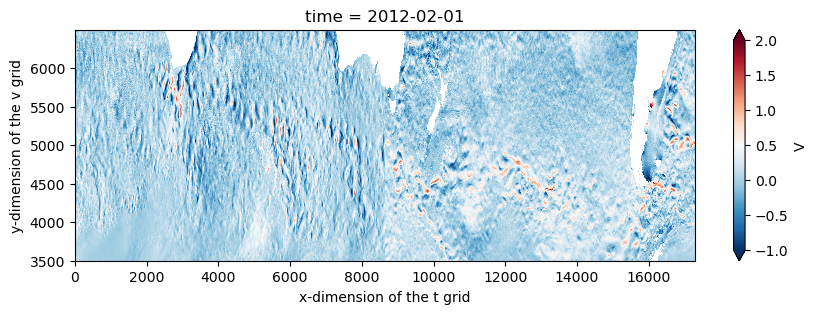

In [177]:
llcw0 = ds.sel(time=slice('2012-02-01','2012-04-30')).isel(i_g=slice(i1, i2), j=slice(j1, j2),
                                                         i=slice(i1, i2), j_g=slice(j1, j2))

fig, ax = plt.subplots(figsize=(10, 3))  # 设置图像大小
llcw0.V.isel(time=0).plot(ax=ax, cmap='RdBu_r', vmax=2, vmin=-1, rasterized=True, shading='auto')
# ax.set_aspect('equal')  # 设置长宽比为1:1

plt.show()


In [178]:
llcw2 = xr.merge([llcw0,  dxC_sel, dyC_sel, dxG_sel,
                      dyG_sel,XC_sel, YC_sel,dyG_sel])
llcw2

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 17280, j: 3000, time: 2160, i: 17280, j_g: 3000)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 3500 3501 3502 3503 3504 ... 6495 6496 6497 6498 6499
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j_g      (j_g) int64 3500 3501 3502 3503 3504 ... 6495 6496 6497 6498 6499
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 820, 4320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 820, 4320), meta=np.ndarray>
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 820, 4320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(820, 4320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(820, 4320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(820, 4320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(820, 4320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(820, 4320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(820, 4320), meta=np.ndarray>

In [179]:
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
#     ('Z',): ['drC'], # Z distances
    # ('X', 'Y'): ['rA', 'rAs', 'rAw'] # Areas
}


gridllc = Grid(llcw2, periodic=[],
               coords={
#                        'Z':{'center':'k','outer':'k_p1'},
                       'Y':{'center':'j','left':'j_g'},
                       'X':{'center':'i','left':'i_g'}},
               metrics=metrics
              )
gridllc

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center

[########################################] | 100% Completed | 3.09 ss
[########################################] | 100% Completed | 3.18 s
[########################################] | 100% Completed | 3.28 s
[########################################] | 100% Completed | 3.29 s


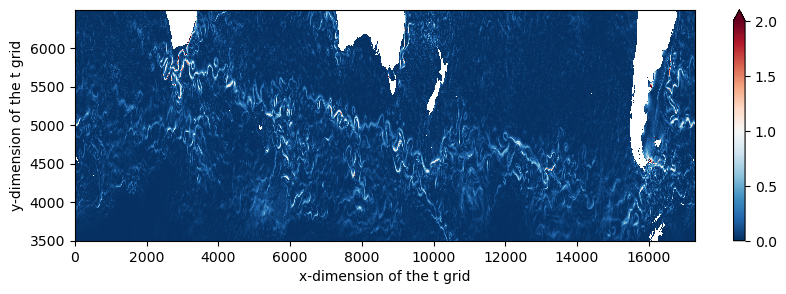

In [180]:
#  统一坐标轴之后，计算KE，坐标不一致无法计算。
tmp=.5*(gridllc.interp(llcw2.U.isel(time=0)**2,'X',boundary='extend')
                       + gridllc.interp(llcw2.V.isel(time=0)**2,'Y',boundary='extend')
                      )
tmp.plot(cmap='RdBu_r', vmax=2, vmin=0, rasterized=True, shading='auto',figsize=(10, 3), aspect='equal')


[########################################] | 100% Completed | 2.76 ss
[########################################] | 100% Completed | 2.86 s
[########################################] | 100% Completed | 2.86 s
[########################################] | 100% Completed | 2.87 s
[########################################] | 100% Completed | 611.96 ms
[########################################] | 100% Completed | 711.24 ms
[########################################] | 100% Completed | 716.77 ms
[########################################] | 100% Completed | 813.15 ms
[########################################] | 100% Completed | 611.22 ms
[########################################] | 100% Completed | 617.97 ms
[########################################] | 100% Completed | 619.28 ms
[########################################] | 100% Completed | 715.41 ms
[########################################] | 100% Completed | 610.10 ms
[########################################] | 100% Completed | 710.03 ms
[##

/tmp/ipykernel_1315/2633179232.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(llcw2.XC, llcw2.YC,


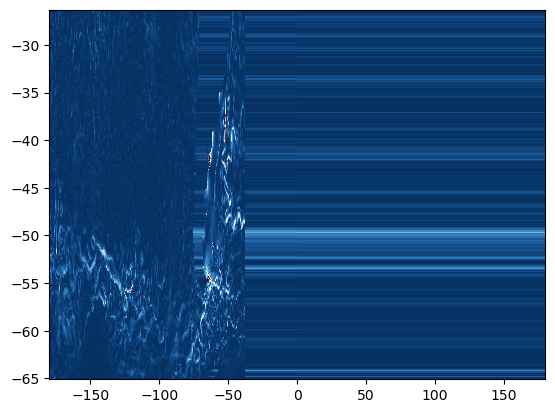

In [181]:
plt.pcolormesh(llcw2.XC, llcw2.YC,
                   .5*(gridllc.interp(llcw2.U.isel(time=0)**2,'X',boundary='extend')
                       + gridllc.interp(llcw2.V.isel(time=0)**2,'Y',boundary='extend')
                      ), 
                   cmap='RdBu_r', vmax=2, vmin=0, rasterized=True, shading='auto')

In [182]:
# Calculate the expected number of points for full 360 degrees
expected_num_points = 360 * 48

# Generate the interpolated longitudes for full 360 degrees
full_start_longitude = -180  # Starting point for full 360 degrees
full_end_longitude = 180  # Ending point for full 360 degrees

interpolated_longitudes_full = np.linspace(full_start_longitude, full_end_longitude, expected_num_points, endpoint=False)

# Shift the starting point to -37 degrees
start_longitude = XC_sel.isel(i=0,j=0).values  # The longitude to start the interpolation from
interval = 1/48  # The interval between interpolated points
shifted_start_index = int((start_longitude - full_start_longitude) / interval)

# Roll the array so it starts from -37 degrees
shifted_interpolated_longitudes = np.roll(interpolated_longitudes_full, -shifted_start_index)

# Output first 10 and last 10 values as an example
first_10 = shifted_interpolated_longitudes[:10]
last_10 = shifted_interpolated_longitudes[-10:]
array_length = len(shifted_interpolated_longitudes)

first_10, last_10, array_length


[########################################] | 100% Completed | 407.47 ms
[########################################] | 100% Completed | 507.97 ms
[########################################] | 100% Completed | 608.83 ms
[########################################] | 100% Completed | 707.75 ms


(array([-38.        , -37.97916667, -37.95833333, -37.9375    ,
        -37.91666667, -37.89583333, -37.875     , -37.85416667,
        -37.83333333, -37.8125    ]),
 array([-38.20833333, -38.1875    , -38.16666667, -38.14583333,
        -38.125     , -38.10416667, -38.08333333, -38.0625    ,
        -38.04166667, -38.02083333]),
 17280)

In [183]:
# 计算边缘坐标
x_edges = shifted_interpolated_longitudes
y_edges = np.linspace(llcw2.YC.min(), llcw2.YC.max(), llcw2.YC.shape[0])


[########################################] | 100% Completed | 615.05 ms
[########################################] | 100% Completed | 714.30 ms
[########################################] | 100% Completed | 812.29 ms
[########################################] | 100% Completed | 813.78 ms
[########################################] | 100% Completed | 618.58 ms
[########################################] | 100% Completed | 719.53 ms
[########################################] | 100% Completed | 810.30 ms
[########################################] | 100% Completed | 818.45 ms


In [184]:
subsampled_x_edges = x_edges[::10]
subsampled_y_edges = y_edges[::10]
subsampled_x_edges.shape

(1728,)

In [187]:
data = 0.5 * (gridllc.interp(llcw2.U.isel(time=0)**2, 'X', boundary='extend') + gridllc.interp(llcw2.V.isel(time=0)**2, 'Y', boundary='extend'))
subsampled_data =data[::10, ::10]
subsampled_data.to_netcdf('my_dataset.nc')

[########################################] | 100% Completed | 2.76 ss
[########################################] | 100% Completed | 2.86 s
[########################################] | 100% Completed | 2.95 s
[########################################] | 100% Completed | 3.05 s


[########################################] | 100% Completed | 2.65 ss
[########################################] | 100% Completed | 2.75 s
[########################################] | 100% Completed | 2.85 s
[########################################] | 100% Completed | 2.85 s


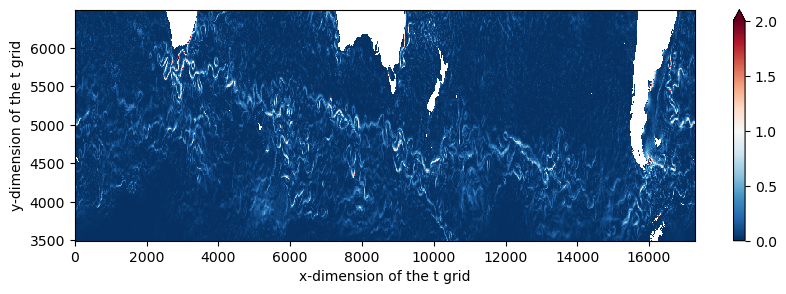

In [189]:
subsampled_data.plot(cmap='RdBu_r', vmax=2, vmin=0, rasterized=True, shading='auto',figsize=(10, 3), aspect='equal')


[########################################] | 100% Completed | 2.76 ss
[########################################] | 100% Completed | 2.77 s
[########################################] | 100% Completed | 2.86 s
[########################################] | 100% Completed | 2.87 s
[########################################] | 100% Completed | 2.77 ss
[########################################] | 100% Completed | 2.85 s
[########################################] | 100% Completed | 2.86 s
[########################################] | 100% Completed | 2.96 s


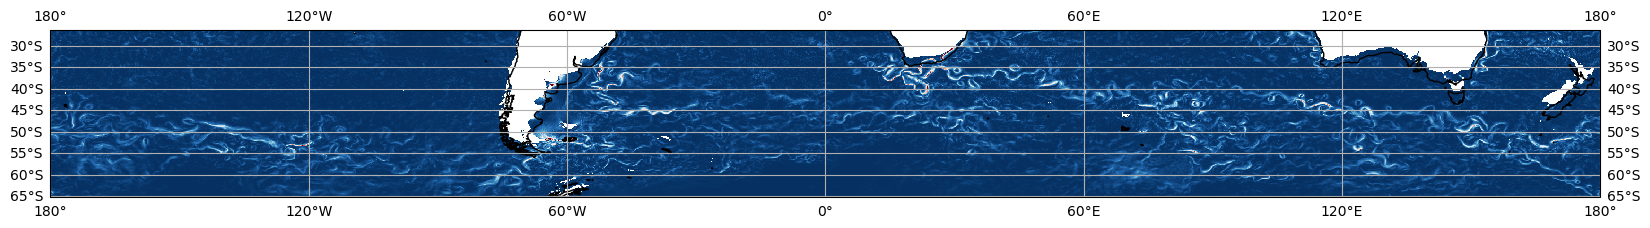

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 假设你已经有了 x_edges, y_edges, 和数据（这里用data表示）
# x_edges = ...
# y_edges = ...

# 创建一个图像对象并设置投影
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': ccrs.PlateCarree()})

# 使用pcolormesh在子图上绘制图像，同时提供边缘坐标
pc = ax.pcolormesh(subsampled_x_edges, subsampled_y_edges, subsampled_data, cmap='RdBu_r', vmax=2, vmin=0, transform=ccrs.PlateCarree())

# 添加颜色条
# cbar = plt.colorbar(pc, orientation='vertical')
# cbar.set_label('KE')  # 设置颜色条标签

# 添加其他标签和标题
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.set_title('Kinetic Energy Distribution')

# 添加海岸线和网格线
ax.coastlines()
# ax.gridlines()
ax.gridlines(draw_labels=True, dms=True)
# plt.savefig('image_high_dpi.png', dpi=300)

# 显示图像
plt.show()


[########################################] | 100% Completed | 3.54 ss


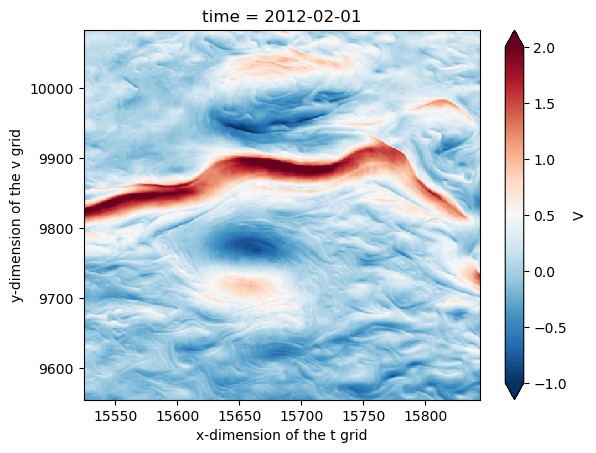

In [6]:
llcw0=ds.sel(time=slice('2012-02-01','2012-04-30')).isel(i_g=slice(15355+170,15845), j=slice(9555,10198-115),
                                            i=slice(15355+170,15845), j_g=slice(9555,10198-115))
# llcw0=ds.sel(time=slice('2012-02-01','2012-04-30')).isel(j=slice(4000,6000),j_g=slice(4000,6000),
#                                             i=slice(2000,4000),i_g=slice(2000,4000))

llcw0.V.isel(time=0).plot(cmap='RdBu_r', vmax=2, vmin=-1, rasterized=True, shading='auto')

In [7]:
dxC_sel = coords.dxC.isel(i_g=slice(15355+170,15845), j=slice(9555,10198-115))
dyG_sel = coords.dyG.isel(i_g=slice(15355+170,15845), j=slice(9555,10198-115))
dyC_sel = coords.dyC.isel(i=slice(15355+170,15845), j_g=slice(9555,10198-115))
dxG_sel = coords.dxG.isel(i=slice(15355+170,15845), j_g=slice(9555,10198-115))
XC_sel = coords.XC.isel(i=slice(15355+170,15845), j=slice(9555,10198-115))
YC_sel = coords.YC.isel(i=slice(15355+170,15845), j=slice(9555,10198-115))
# dyG_sel= coords.dyG.isel(i_g=slice(15355+170,15845), j=slice(9555,10198-115))


In [8]:
llcw2 = xr.merge([llcw0,  dxC_sel, dyC_sel, dxG_sel,
                      dyG_sel,XC_sel, YC_sel,dyG_sel])
llcw2

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 320, j: 528, time: 2160, i: 320, j_g: 528)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 15525 15526 15527 15528 ... 15841 15842 15843 15844
  * j        (j) int64 9555 9556 9557 9558 9559 ... 10079 10080 10081 10082
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
  * i        (i) int64 15525 15526 15527 15528 15529 ... 15841 15842 15843 15844
  * j_g      (j_g) int64 9555 9556 9557 9558 9559 ... 10079 10080 10081 10082
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 528, 320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 528, 320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(528, 320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(528, 320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(528, 320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(528, 320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(528, 320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(528, 320), meta=np.ndarray>

[########################################] | 100% Completed | 406.70 ms


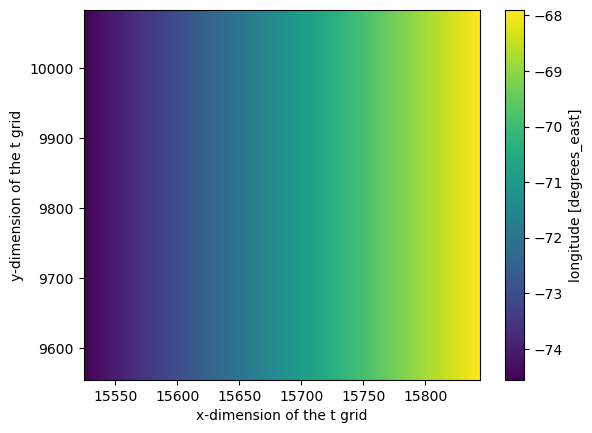

In [9]:
llcw2.XC.plot()

[########################################] | 100% Completed | 2.02 ss
[########################################] | 100% Completed | 406.08 ms


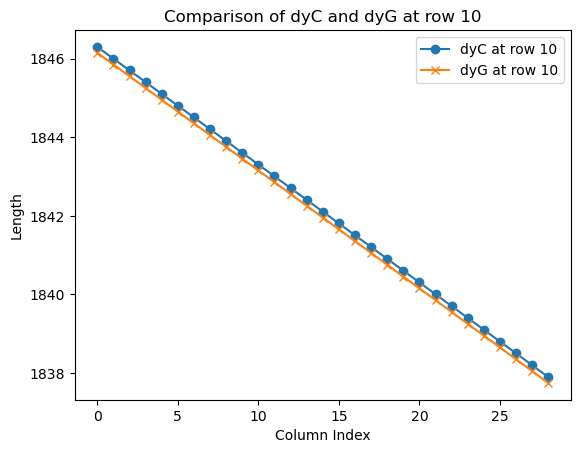

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 llcw2.dyC 和 llcw2.dyG 是您从模型中获取的数据
dyC = llcw2.dyC  # 替换为实际数据
dyG = llcw2.dyG  # 替换为实际数据

# 提取一条线，例如第10行
dyC_line = dyC[1:30, 9]  # Python索引从0开始，所以第10行是索引9
dyG_line = dyG[1:30, 9]

# 绘制这两条线进行比较
plt.figure()
plt.plot(dyC_line, label='dyC at row 10', marker='o')
plt.plot(dyG_line, label='dyG at row 10', marker='x')
plt.legend()
plt.xlabel('Column Index')
plt.ylabel('Length')
plt.title('Comparison of dyC and dyG at row 10')
plt.show()


[########################################] | 100% Completed | 507.09 ms
[########################################] | 100% Completed | 406.18 ms


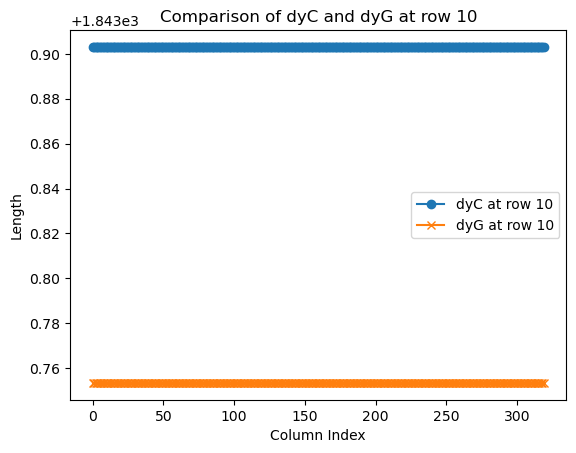

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 llcw2.dyC 和 llcw2.dyG 是您从模型中获取的数据
dyC = llcw2.dyC  # 替换为实际数据
dyG = llcw2.dyG  # 替换为实际数据

# 提取一条线，例如第10行
dyC_line = dyC[9, :]  # Python索引从0开始，所以第10行是索引9
dyG_line = dyG[9, :]

# 绘制这两条线进行比较
plt.figure()
plt.plot(dyC_line, label='dyC at row 10', marker='o')
plt.plot(dyG_line, label='dyG at row 10', marker='x')
plt.legend()
plt.xlabel('Column Index')
plt.ylabel('Length')
plt.title('Comparison of dyC and dyG at row 10')
plt.show()


In [12]:
dyG

<xarray.DataArray 'dyG' (j: 528, i_g: 320)>
dask.array<where, shape=(528, 320), dtype=float32, chunksize=(528, 320), chunktype=numpy.ndarray>
Coordinates:
  * i_g      (i_g) int64 15525 15526 15527 15528 ... 15841 15842 15843 15844
  * j        (j) int64 9555 9556 9557 9558 9559 ... 10079 10080 10081 10082
Attributes:
    coordinate:     YC XG
    long_name:      cell y size
    standard_name:  cell_y_size_at_u_location
    units:          m

In [14]:
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
#     ('Z',): ['drC'], # Z distances
    # ('X', 'Y'): ['rA', 'rAs', 'rAw'] # Areas
}


gridllc = Grid(llcw2, periodic=[],
               coords={
#                        'Z':{'center':'k','outer':'k_p1'},
                       'Y':{'center':'j','left':'j_g'},
                       'X':{'center':'i','left':'i_g'}},
               metrics=metrics
              )
gridllc

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center

In [15]:
llcw2.U

<xarray.DataArray 'U' (time: 2160, j: 528, i_g: 320)>
dask.array<getitem, shape=(2160, 528, 320), dtype=float32, chunksize=(1, 528, 320), chunktype=numpy.ndarray>
Coordinates:
  * i_g      (i_g) int64 15525 15526 15527 15528 ... 15841 15842 15843 15844
  * j        (j) int64 9555 9556 9557 9558 9559 ... 10079 10080 10081 10082
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00

In [36]:
gridllc.interp(llcw2.U,'X',boundary='extend') # 坐标轴的变换

<xarray.DataArray 'U' (time: 2160, j: 528, i: 320)>
dask.array<transpose, shape=(2160, 528, 320), dtype=float32, chunksize=(1, 528, 320), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 9555 9556 9557 9558 9559 ... 10079 10080 10081 10082
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
  * i        (i) int64 15525 15526 15527 15528 15529 ... 15841 15842 15843 15844

[########################################] | 100% Completed | 507.18 ms


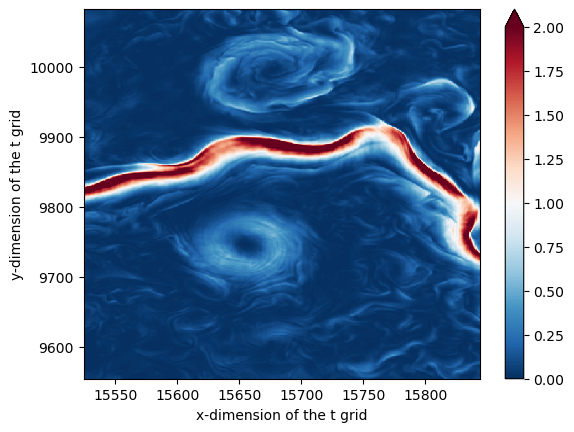

In [17]:
#  统一坐标轴之后，计算KE，坐标不一致无法计算。
tmp=.5*(gridllc.interp(llcw2.U.isel(time=0)**2,'X',boundary='extend')
                       + gridllc.interp(llcw2.V.isel(time=0)**2,'Y',boundary='extend')
                      )
tmp.plot(cmap='RdBu_r', vmax=2, vmin=0, rasterized=True, shading='auto')

[########################################] | 100% Completed | 507.05 ms
[########################################] | 100% Completed | 304.30 ms
[########################################] | 100% Completed | 304.72 ms
[########################################] | 100% Completed | 405.76 ms
[########################################] | 100% Completed | 306.29 ms
[########################################] | 100% Completed | 304.71 ms
[########################################] | 100% Completed | 304.57 ms


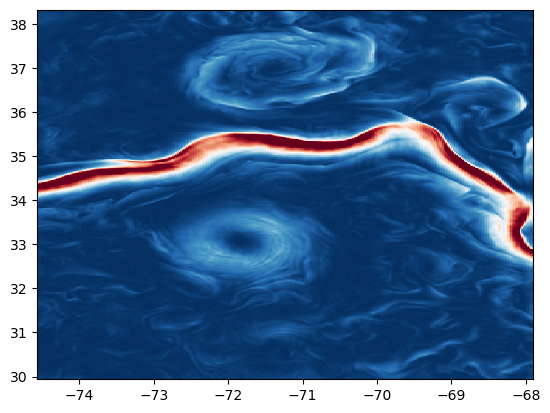

In [18]:
plt.pcolormesh(llcw2.XC, llcw2.YC,
                   .5*(gridllc.interp(llcw2.U.isel(time=0)**2,'X',boundary='extend')
                       + gridllc.interp(llcw2.V.isel(time=0)**2,'Y',boundary='extend')
                      ), 
                   cmap='RdBu_r', vmax=2, vmin=0, rasterized=True, shading='auto')

[########################################] | 100% Completed | 1.22 sms
[########################################] | 100% Completed | 708.68 ms
[########################################] | 100% Completed | 507.81 ms
[########################################] | 100% Completed | 505.86 ms
[########################################] | 100% Completed | 607.57 ms
[########################################] | 100% Completed | 405.98 ms
[########################################] | 100% Completed | 507.38 ms


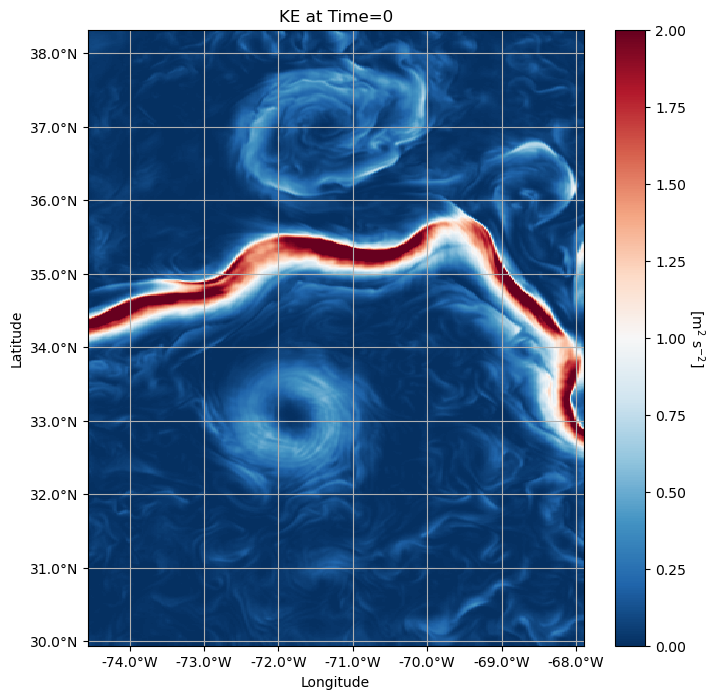

In [19]:
from matplotlib.ticker import FuncFormatter

def format_longitude(x, pos):
    return f"{x:.1f}°W"

def format_latitude(y, pos):
    return f"{y:.1f}°N"

plt.figure(figsize=(8, 8))
plt.pcolormesh(llcw2.XC, llcw2.YC,
               .5 * (gridllc.interp(llcw2.U.isel(time=0)**2, 'X', boundary='extend') +
                     gridllc.interp(llcw2.V.isel(time=0)**2, 'Y', boundary='extend')),
               cmap='RdBu_r', vmax=2, vmin=0, rasterized=True, shading='auto')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KE at Time=0')

# 设置坐标轴刻度的格式
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_longitude))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_latitude))

cbar = plt.colorbar()
cbar.set_label(r'[m$^2$ s$^{-2}$]', rotation=270, labelpad=15)
plt.grid(True)
plt.show()


# Assume a local Cartesian plane

In [20]:
%%time
Ny1 = len(llcw2.j)
Nx1 = len(llcw2.i_g)
dx1 = llcw2.dxC.mean(skipna=True).load()
dy1 = llcw2.dyG.mean(skipna=True).load()

[########################################] | 100% Completed | 607.98 ms
[########################################] | 100% Completed | 505.77 ms
CPU times: user 430 ms, sys: 156 ms, total: 586 ms
Wall time: 1.13 s


In [21]:
dy1.values

array(1764.6693, dtype=float32)

In [22]:
with ProgressBar():
    U_llc = xr.DataArray(llcw2.U, dims=['time','YC','XC'],
                            coords={'time':np.arange(len(llcw2.U.time))*3600, # second unit
                                    'YC':np.arange(0,Ny1*dy1,dy1),
                                    'XC':np.arange(0,Nx1*dx1,dx1)} # Disctance in m
                           ).chunk({'time':100,'YC':-1,'XC':-1})

    V_llc = xr.DataArray(llcw2.V, dims=['time','YC','XC'],
                            coords={'time':np.arange(len(llcw2.U.time))*3600,
                                    'YC':np.arange(0,Ny1*dy1,dy1),
                                    'XC':np.arange(0,Nx1*dx1,dx1)}
                           ).chunk({'time':100,'YC':-1,'XC':-1})

[########################################] | 100% Completed | 9.76 ss


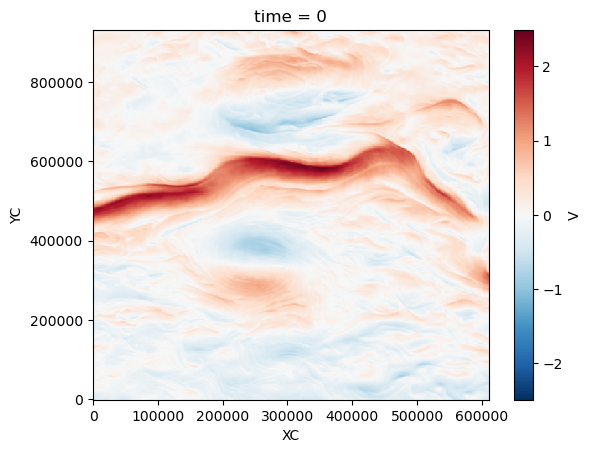

In [23]:
V_llc.isel(time=0).plot()

# Take the $\omega$-$k$ Fourier transform

In [24]:
%%time
# FFT. 先进行空间的，在进行时间的，最后得到的两个都有
Fu_llc = xrft.fft(xrft.fft(U_llc.fillna(0.), 
                              dim=['YC','XC'], window='hann', detrend='constant', 
                              true_phase=True, true_amplitude=True
                             ).chunk({'time':-1,'freq_YC':200,'freq_XC':200}),
                     dim=['time'], window='hann', detrend='constant', 
                     true_phase=True, true_amplitude=True
                    )

Fu_lls = Fu_llc.isel(freq_time=slice(len(Fu_llc.freq_time)//2,None)) * 2

Fv_llc = xrft.fft(xrft.fft(V_llc.fillna(0.), 
                              dim=['YC','XC'], window='hann', detrend='constant', 
                              true_phase=True, true_amplitude=True
                             ).chunk({'time':-1,'freq_YC':200,'freq_XC':200}),
                     dim=['time'], window='hann', detrend='constant', 
                     true_phase=True, true_amplitude=True
                    )

Fv_llc = Fv_llc.isel(freq_time=slice(len(Fv_llc.freq_time)//2,None)) * 2

CPU times: user 141 ms, sys: 50 µs, total: 142 ms
Wall time: 140 ms


In [25]:
Fv_llc

<xarray.DataArray (freq_time: 1080, freq_YC: 528, freq_XC: 320)>
dask.array<mul, shape=(1080, 528, 320), dtype=complex128, chunksize=(1080, 200, 200), chunktype=numpy.ndarray>
Coordinates:
  * freq_YC    (freq_YC) float64 -0.0002833 -0.0002823 ... 0.0002812 0.0002823
  * freq_XC    (freq_XC) float64 -0.0002612 -0.0002596 ... 0.000258 0.0002596
  * freq_time  (freq_time) float64 0.0 1.286e-07 ... 0.0001386 0.0001388

# Function to isotropize the power spectra

In [26]:
def _binned_agg(
    array: np.ndarray,
    indices: np.ndarray,
    num_bins: int,
    *,
    func,
    fill_value,
    dtype,
) -> np.ndarray:
    """NumPy helper function for aggregating over bins."""

    try:
        import numpy_groupies
    except ImportError:
        raise ImportError(
            "This function requires the `numpy_groupies` package to be installed. "
            + "Please install it with pip or conda."
        )

    mask = np.logical_not(np.isnan(indices))
    int_indices = indices[mask].astype(int)
    shape = array.shape[: -indices.ndim] + (num_bins,)
    result = numpy_groupies.aggregate(
        int_indices,
        array[..., mask],
        func=func,
        size=num_bins,
        fill_value=fill_value,
        dtype=dtype,
        axis=-1,
    )
    return result


def _groupby_bins_agg(
    array: xr.DataArray,
    group: xr.DataArray,
    bins,
    func="sum",
    fill_value=0,
    dtype=None,
    **cut_kwargs,
) -> xr.DataArray:
    """Faster equivalent of Xarray's groupby_bins(...).sum()."""
    # https://github.com/pydata/xarray/issues/4473
    binned = pd.cut(np.ravel(group), bins, **cut_kwargs)
    new_dim_name = group.name + "_bins"
    indices = group.copy(data=binned.codes.reshape(group.shape))

    result = xr.apply_ufunc(
        _binned_agg,
        array,
        indices,
        input_core_dims=[indices.dims, indices.dims],
        output_core_dims=[[new_dim_name]],
        output_dtypes=[array.dtype],
        dask_gufunc_kwargs=dict(
            allow_rechunk=True,
            output_sizes={new_dim_name: binned.categories.size},
        ),
        kwargs={
            "num_bins": binned.categories.size,
            "func": func,
            "fill_value": fill_value,
            "dtype": dtype,
        },
        dask="parallelized",
    )
    result.coords[new_dim_name] = binned.categories
    return result


def isotropize(ps, fftdim, nfactor=4, **kwargs):
    """
    Isotropize a 2D power spectrum or cross spectrum
    by taking an azimuthal average.
    .. math::
        \text{iso}_{ps} = k_r N^{-1} \sum_{N} |\mathbb{F}(da')|^2
    where :math:`N` is the number of azimuthal bins.
    Parameters
    ----------
    ps : `xarray.DataArray`
        The power spectrum or cross spectrum to be isotropized.
    fftdim : list
        The fft dimensions overwhich the isotropization must be performed.
    nfactor : int, optional
        Ratio of number of bins to take the azimuthal averaging with the
        data size. Default is 4.
    """

    # compute radial wavenumber bins
    k = ps[fftdim[1]]
    l = ps[fftdim[0]]

    N = [k.size, l.size]
    nbins = int(min(N) / nfactor)
    freq_r = np.sqrt(k ** 2 + l ** 2).rename("freq_r")
    kr = _groupby_bins_agg(freq_r, freq_r, bins=nbins, func="mean")

    if "truncate" in kwargs:
        if truncate:
            if k.max() > l.max():
                kmax = l.max()
            else:
                kmax = k.max()
            kr = kr.where(kr <= kmax)
        else:
            pass

    iso_ps = (
        _groupby_bins_agg(ps, freq_r, bins=nbins, func="mean")
        .rename({"freq_r_bins": "freq_r"})
        .drop_vars("freq_r")
    )
    iso_ps.coords["freq_r"] = kr.data
    if "truncate" in kwargs:
        if truncate:
            return (iso_ps * iso_ps.freq_r).dropna("freq_r")
    else:
        return iso_ps * iso_ps.freq_r

In [27]:
def density(ps, dim):
    ff = np.prod([float(ps[d].spacing) for d in dim])
    return ps * ff

In [28]:
# # Below, we use the dask cluster. The compute is much more.
# from dask_gateway import GatewayCluster
# from dask.distributed import Client
# cluster = GatewayCluster()
# cluster.scale(8)
# client = Client(cluster)
# # client = Client(n_workers=16, threads_per_worker=1, memory_limit='4GB')
# # cluster
# client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.cd1195509d9445c4bff0d4099c1c297d/status,


In [29]:
# client.close()
# cluster.close()

In [30]:
with ProgressBar():
    isoFu_llc = isotropize(density(np.abs(Fu_llc.chunk({'freq_time':10}))**2,
                                      ['freq_time','freq_YC','freq_XC']), 
                              ['freq_YC','freq_XC'], nfactor=4, 
                              kwargs={'truncate':True}
                             ).compute()
    isoFv_llc = isotropize(density(np.abs(Fv_llc.chunk({'freq_time':10}))**2,
                                      ['freq_time','freq_YC','freq_XC']),  
                              ['freq_YC','freq_XC'], nfactor=4, 
                              kwargs={'truncate':True}
                             ).compute()

[########################################] | 100% Completed | 215.15 s
[########################################] | 100% Completed | 215.15 s
[########################################] | 100% Completed | 216.63 s
[########################################] | 100% Completed | 216.70 s


In [31]:
o1 = 25.81933871**-1
k1 = 23.93447213**-1
m2 = 12.4206012**-1
s2 = 12**-1
cs = 0.30404039  # 10th internal wave phase speed

# Plot the spectra

In [32]:
def plot(isoF, omega, f, title=r'eNATL60'):
    fig, (ax1,ax2) = plt.subplots(figsize=(11,4), nrows=1, ncols=2)
    fig.set_tight_layout(True)

    im = ax1.pcolormesh(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
                        isoF.freq_time.isel(freq_time=slice(1,None))*3600,
                        isoF.isel(freq_time=slice(1,None),freq_r=slice(1,None)), 
                        cmap='inferno', 
                        norm=clr.LogNorm(vmin=5e-1, vmax=5e6), 
                        shading='auto', rasterized=True
                       )
    ax1.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             xr.ones_like(isoF.freq_r.isel(freq_r=slice(1,None)))
             * (f/2/np.pi).mean() * 3600,
             c='grey'
            )
    ax1.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             np.sqrt(((f.isel(YC=0))**2).mean() 
                     + cs**2*(isoF.freq_r.isel(freq_r=slice(1,None))*2*np.pi)**2
                    )/2/np.pi * 3600,
             'w', lw=1
            )
    ax1.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             np.sqrt(((f.isel(YC=0))**2).mean() 
                     + (cs*10)**2*(isoF.freq_r.isel(freq_r=slice(1,None))*2*np.pi)**2
                    )/2/np.pi * 3600,
             'w', lw=1
            )
    ax1.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             np.sqrt(((f.isel(YC=0))**2).mean() 
                     + (cs*5)**2*(isoF.freq_r.isel(freq_r=slice(1,None))*2*np.pi)**2
                    )/2/np.pi * 3600,
             'w', lw=1
            )
    ax1.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             np.sqrt(((f.isel(YC=0))**2).mean() 
                     + (cs*2.5)**2*(isoF.freq_r.isel(freq_r=slice(1,None))*2*np.pi)**2
                    )/2/np.pi * 3600,
             'w', lw=1
            )
    ax1.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             omega*3600,
             'k', lw=3
            )

    ax1.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             xr.ones_like(isoF.freq_r.isel(freq_r=slice(1,None)))*m2,
             'w--'
            )
    ax1.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             xr.ones_like(isoF.freq_r.isel(freq_r=slice(1,None)))*s2,
             'w--'
            )

    ax1.set_ylim([5e-3,5e-1])
    ax1.set_xlim([7e-3,7e-1])
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_ylabel(r"$\omega$ [cph]", fontsize=13)
    ax1.set_xlabel(r"$k$ [cpkm]", fontsize=13)

    cbar = fig.colorbar(im, ax=ax1)
    cbar.set_label(r"[(m$^2$ s$^{-2}$)$/$cpm$/$cps]", fontsize=12)

    ax2.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             (isoF.isel(freq_time=slice(1,None),freq_r=slice(1,None)).where(isoF.freq_time<omega)
              * np.diff(isoF.freq_time)[0]
             ).sum('freq_time',skipna=True),
             c='k', label=r"Balanced"
            )
    ax2.plot(isoF.freq_r.isel(freq_r=slice(1,None))*1e3,
             (isoF.isel(freq_time=slice(1,None),freq_r=slice(1,None)).where(isoF.freq_time>omega)
              * np.diff(isoF.freq_time)[0]
             ).sum('freq_time',skipna=True),
             c='grey', label=r"Unbalanced"
            )
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlim([6e-3,8e-1])
    ax2.set_ylabel(r"[(m$^2$ s$^{-2}$)$/$cpm]", fontsize=13)
    ax2.set_xlabel(r"$k$ [cpkm]", fontsize=13)
    ax2.legend(loc='lower left', fontsize=12)
    
    fig.suptitle(title, fontsize=15)

[########################################] | 100% Completed | 405.15 ms
[########################################] | 100% Completed | 507.84 ms
[########################################] | 100% Completed | 305.33 ms
[########################################] | 100% Completed | 304.35 ms
[########################################] | 100% Completed | 304.44 ms
[########################################] | 100% Completed | 305.66 ms
[########################################] | 100% Completed | 304.49 ms
[########################################] | 100% Completed | 304.05 ms


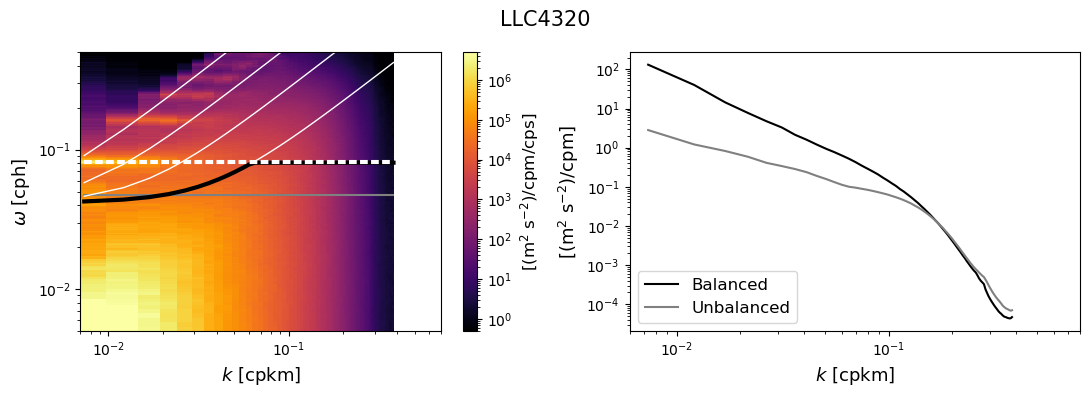

In [33]:
enatlf = xr.DataArray(xr.apply_ufunc(gsw.f, llcw2.YC, dask='parallelized').data,
                      dims=['YC','XC'], coords={'YC':U_llc.YC,'XC':U_llc.XC})
omega = np.sqrt(((enatlf.isel(YC=0))**2).mean() 
                + cs**2*(isoFu_llc.freq_r.isel(freq_r=slice(1,None))*2*np.pi)**2
               )/2/np.pi
omega = xr.DataArray(np.minimum(omega, m2/3600), dims='freq_r',
                     coords={'freq_r':isoFu_llc.freq_r.isel(freq_r=slice(1,None))}
                    )
plot(.5*(isoFu_llc + isoFv_llc),
     omega, enatlf,title=r"LLC4320")